## Imports

In [247]:
import os
import glob
import pickle
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
import statistics as stats
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

dirname = 'dataset'

## Files

In [2]:
files = glob.glob(os.path.join(dirname, '**'), recursive=True)
files = sorted(files[1:], key=lambda x: os.path.splitext(x)[1])
files = (files[7],files[9])
for file in files:
    print(file[len(dirname)+1:])

task_2_annotations_82d1d6d1093eaab6_e330cbf_pandas.pkl
task_2_features_1d8b658c21ddc127_e330cbf_pandas.pkl


In [3]:
pandas_annot = pd.read_pickle(f'{files[0]}')
pandas_annot_df = pd.DataFrame.from_dict(pandas_annot)
# pandas_annot_df.head()

In [4]:
pandas_features = pd.read_pickle(f'{files[1]}')
pandas_feature_df = pd.DataFrame.from_dict(pandas_features)
# pandas_feature_df.head()

In [5]:
# add class labels
def label_race(row):
   if row['valence'] <= 0 and row['arousal'] > 3:
        return 'angry'
   elif row['valence'] > 0 and row['arousal'] >= 3:
       return 'happy'
   elif row['valence'] < 0 and row['arousal'] <= 3:
       return 'sad'
   elif row['valence'] >= 0 and row['arousal'] < 3:
       return 'relaxed'

pandas_annot_df['class'] = pandas_annot_df.apply(lambda row: label_race(row), axis=1)
pandas_annot_df.head()

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering,class
0,1,0,91,1,-1,2,1,2,4,2.0,1,1,1,2,3,2,1,1.0,2,sad
31,1,0,19,2,-1,3,3,3,4,4.0,1,2,3,3,3,2,2,3.0,3,sad
62,1,0,189,2,0,2,1,2,1,4.0,2,2,1,1,3,2,1,1.0,4,relaxed
93,1,0,126,2,2,4,5,2,3,5.0,2,4,1,3,5,1,2,2.0,5,relaxed
124,1,0,26,4,2,3,5,2,3,3.0,1,3,4,1,4,1,2,3.0,1,happy


## Question 1
How consistent are the emotion annotations? Do different annotators agree in their ratings of the same excerpt?

In [6]:
pandas_annot_df.describe()

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
count,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2637.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2637.000000,2638.000000
mean,6.037149,13.000000,97.071645,2.929492,0.020849,2.901440,2.673616,2.366187,2.723275,2.395525,2.313495,2.276725,2.596664,2.148218,2.968537,2.561031,2.434420,2.690178,2.496209
std,3.179759,7.806583,56.340712,1.184031,1.099842,1.267184,1.235916,1.297041,1.371744,1.367916,1.232190,1.239287,1.412181,1.177312,1.329116,1.261079,1.264754,1.258940,1.279556
min,1.000000,0.000000,0.000000,1.000000,-2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,6.000000,48.000000,2.000000,-1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
50%,6.000000,13.000000,97.000000,3.000000,0.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000
75%,9.000000,20.000000,146.000000,4.000000,1.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000
max,11.000000,26.000000,194.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [369]:
alt.Chart(pandas_annot_df).mark_circle(size=60, opacity=0.6).encode(
    x='segment_id',
    y='annotator_id',
    color='class',
    tooltip=['segment_id']
).properties(
    width=800,
    height=400
)

alt.Chart(...)

Because the annotators were given two different sets of segments, I seperated them into two plots.

In [368]:
df1 = pandas_annot_df[pandas_annot_df['segment_id']%2==0]
chart1 = alt.Chart(df1).mark_circle(size=60, opacity=0.6).encode(
    x='segment_id',
    y='annotator_id',
    color='class',
    tooltip=['class']
).properties(
    width=400,
    height=300
)

df2 = pandas_annot_df[pandas_annot_df['segment_id']%2!=0]
chart2 = alt.Chart(df2).mark_circle(size=60, opacity=0.6).encode(
    x='segment_id',
    y='annotator_id',
    color='class',
    tooltip=['class']
).properties(
    width=400,
    height=300
)

chart1 | chart2

alt.HConcatChart(...)

Still not much is visible. Although tendencies are identifiable.

In [9]:
# Group by segment ID
grouped_df = pandas_annot_df.groupby('segment_id')
aggregated = pd.DataFrame(data={'Segment ID': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]})

In [10]:
# add each segment's mean to 'aggregated'
def add_mean(col, name):
    grouped_lists = grouped_df[f'{col}'].apply(list)
    temp = []
    for i in grouped_lists:
        mean = np.mean(i)
        temp.append(mean)
    
    aggregated[name] = temp
    
for _ in list(pandas_annot_df)[3:-1]:
    add_mean(_, f'Mean {_}')

In [11]:
aggregated.style.hide_index()

Segment ID,Mean arousal,Mean valence,Mean gems_wonder,Mean gems_transcendence,Mean gems_tenderness,Mean gems_nostalgia,Mean gems_peacefulness,Mean gems_power,Mean gems_joyful_activation,Mean gems_tension,Mean gems_sadness,Mean gemmes_flow,Mean gemmes_movement,Mean gemmes_force,Mean gemmes_interior,Mean gemmes_wandering
0,2.495146,-0.155340,2.990291,2.553398,2.679612,3.495146,3.242718,1.747573,1.902913,1.941748,2.621359,3.689320,1.970874,1.796117,3.242718,2.990291
1,3.217391,0.152174,3.293478,3.119565,2.554348,3.054348,nan,2.293478,2.423913,2.445652,2.000000,3.445652,2.782609,2.500000,2.619565,2.652174
2,3.262136,0.126214,3.029126,2.689320,1.805825,2.029126,1.718447,2.699029,3.135922,3.019417,1.533981,2.572816,3.359223,2.699029,2.165049,2.427184
3,3.141304,-0.304348,2.326087,2.521739,1.510870,1.967391,1.434783,2.858696,2.206522,3.380435,2.293478,2.130435,2.771739,2.891304,2.391304,1.945652
4,3.174757,0.029126,3.398058,2.990291,2.902913,3.233010,2.679612,2.436893,1.854369,2.038835,2.456311,3.495146,1.951456,2.669903,3.097087,2.922330
5,2.456522,0.684783,3.152174,2.663043,2.673913,2.641304,2.934783,2.260870,3.119565,1.652174,1.478261,3.282609,2.826087,2.184783,2.500000,3.000000
6,2.417476,0.631068,3.116505,2.563107,3.893204,3.747573,3.932039,1.398058,2.048544,1.310680,2.281553,4.116505,1.815534,1.601942,3.252427,3.291262
7,3.065217,0.184783,3.293478,2.858696,2.836957,3.206522,2.369565,2.489130,2.402174,2.228261,2.152174,3.239130,2.619565,2.543478,2.771739,2.597826
8,3.291262,0.834951,3.106796,2.834951,2.184466,1.844660,1.932039,2.621359,3.378641,2.553398,1.320388,2.621359,3.485437,2.427184,2.058252,2.291262
9,2.619565,0.163043,3.271739,2.728261,2.934783,3.228261,2.500000,1.782609,2.108696,2.445652,2.347826,3.239130,2.293478,2.010870,2.760870,2.619565


## Statistics

In [12]:
pandas_annot_df = pandas_annot_df.reset_index().sort_index()

In [13]:
def split(df, v):
    return df[df['segment_id'] == v]

In [14]:
# Create 27 seperate dataframes; callable through 'segment_i', where i = 0-26
for i in range(27):
    exec(f'segment_{i} = split(pandas_annot_df, i)')

In [15]:
# Now Check how different the segment annotations are

In [316]:
segment_0.describe().iloc[1:, 4:]

,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
mean,2.495146,-0.155340,2.990291,2.553398,2.679612,3.495146,3.242718,1.747573,1.902913,1.941748,2.621359,3.689320,1.970874,1.796117,3.242718,2.990291
std,1.101459,1.135499,1.150406,1.185932,1.156513,1.153628,1.167081,0.915214,1.107148,1.161686,1.261158,0.960281,0.994655,1.003516,1.167081,1.224706
min,1.000000,-2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,-1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,2.000000
50%,2.000000,0.000000,3.000000,2.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,2.000000,4.000000,2.000000,1.000000,3.000000,3.000000
75%,3.500000,1.000000,4.000000,3.500000,4.000000,4.000000,4.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000
max,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [373]:
def all_in_one_gaussian(segment):
    stats = segment.describe().iloc[1:3, 4:]
    mu = stats.iloc[0:1]
    std = stats.iloc[1:]
    
    x_axis = np.arange(-4, 4, 0.01)
    plt.figure(figsize=(20, 5))
    plt.plot(x_axis, norm.pdf(x_axis, 0, 1), 'r--', label='Normal Distribution')
    plt.legend(loc=2, prop={'size': 15})
    for i in range(stats.shape[1]):
        # alligned mu to be 0, instead of 'mu.iloc[0,i]'
        plt.plot(x_axis, norm.pdf(x_axis, 0, std.iloc[0,i]), label=stats.columns[i], linewidth=2, alpha=0.5)
    plt.title(f'Gaussian of Segment')
    plt.legend(loc=2, prop={'size': 10})
    plt.show()

In [384]:
# all_in_one_gaussian(segment_0)

In [376]:
def gaussian(segment):
    stats = segment.describe().iloc[1:3, 4:]
    mu = stats.iloc[0:1]
    std = stats.iloc[1:]
    
    av = stats.iloc[:,0:2]     # arousal and valence
    gems = stats.iloc[:,2:11]  # gems
    gemmes = stats.iloc[:,11:] # gemmes
    
    x_axis = np.arange(-3, 3, 0.01)
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,20), sharey=True)
    
    # add Normal Distribution for reference
    ax1.plot(x_axis, norm.pdf(x_axis, 0, 1), 'r--', label='Normal Distribution')
    ax1.legend(loc=2, prop={'size': 15})
    ax2.plot(x_axis, norm.pdf(x_axis, 0, 1), 'r--', label='Normal Distribution')
    ax2.legend(loc=2, prop={'size': 15})
    ax3.plot(x_axis, norm.pdf(x_axis, 0, 1), 'r--', label='Normal Distribution')
    ax3.legend(loc=2, prop={'size': 15})
    
    # alligned mu to be 0, instead of 'mu.iloc[0,i]'
    for i in range(av.shape[1]):
        ax1.plot(x_axis, norm.pdf(x_axis, 0, std.iloc[0,i]), label=av.columns[i], linewidth=2, alpha=0.5)
        ax1.set_title('Arousal, Valence')
        ax1.legend(loc=2, prop={'size': 10})
    
    for i in range(gems.shape[1]):
        ax2.plot(x_axis, norm.pdf(x_axis, 0, std.iloc[0,i+av.shape[1]]), label=gems.columns[i], linewidth=2, alpha=0.5)
        ax2.set_title('GEMS')
        ax2.legend(loc=2, prop={'size': 10})
        
    for i in range(gemmes.shape[1]):
        ax3.plot(x_axis, norm.pdf(x_axis, 0, std.iloc[0,i+av.shape[1]+gems.shape[1]]), label=gemmes.columns[i], linewidth=2, alpha=0.5)
        ax3.set_title('GEMMES')
        ax3.legend(loc=2, prop={'size': 10})
        

In [389]:
# gaussian(segment_0)

**Interpretation:** The steeper (or higher) the curve is, the more people agree on the corresponding attribute value.

In [380]:
options = []
for i in range(27):
    options.append(f'segment_{i}')
s = widgets.Dropdown(options=options)
display(s)

Dropdown(options=('segment_0', 'segment_1', 'segment_2', 'segment_3', 'segment_4', 'segment_5', 'segment_6', '…

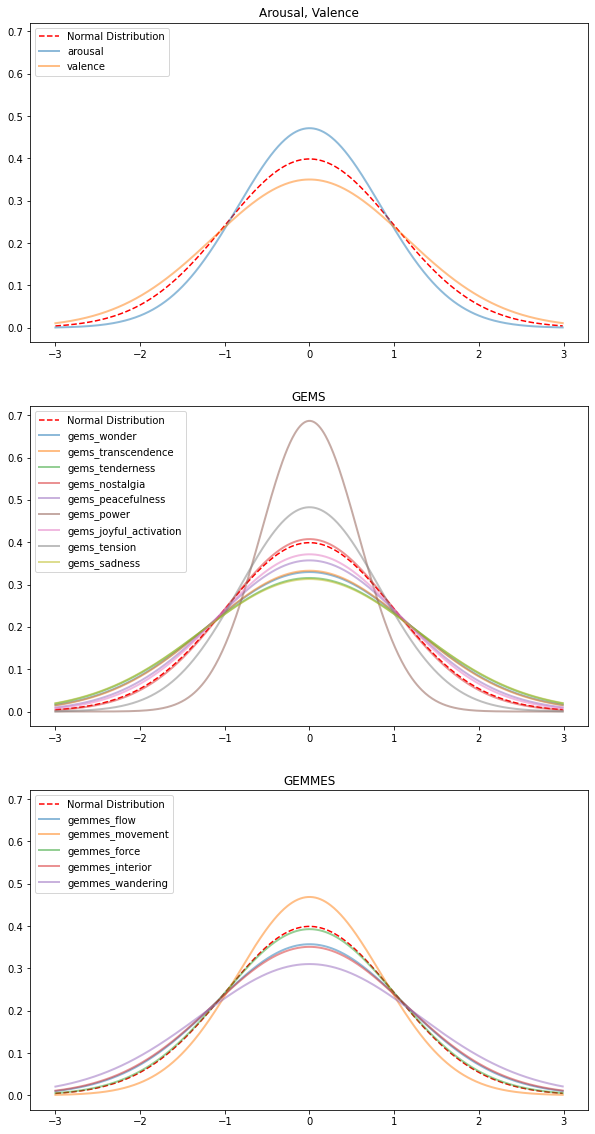

In [395]:
segment_list = [segment_0,segment_1,segment_2,segment_3,segment_4,segment_5,segment_6,segment_7,segment_8,segment_9,segment_10,segment_11,segment_12,segment_13,segment_14,segment_15,segment_16,segment_17,segment_18,segment_19,segment_20,segment_21,segment_22,segment_23,segment_24,segment_25,segment_26]
n = int((s.value[-2] if s.value[-2] != '_' else '') + (s.value[-1]))
segment=segment_list[n]

gaussian(segment)

## Observations:

Each segment has about one annotation that is agreed on by many people. Mostly in the GEMS attributes.
Examples: Segment 8 - GEMS_sadness, Segment 14 - GEMS_peacefulness/GEMS_tenderness, Segment 24 - GEMS_power, ...

But some pieces, like 18, seem to have diverging opinions. None of their Gaussians stand out, they seem to be similar.